In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# import keras
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
df = pd.read_csv('../data/model_data/salaries_with_stats.csv')
df.head(2)

,player,nhl_api_id_number,team,cap hit %,aav,length,weight,height,drafted,slide cand.,...,shifts,shortHandedGoals,shortHandedPoints,shortHandedTimeOnIce,shotPct,shots,timeOnIce,position_F,shoots_Right,contract_is_two_way
0,Connor McDavid,8478402,EDM,16.7,12500000.0,8,193,185,1,0,...,3028.0,1.0,2.0,100.966667,27.2,356.0,2582.600000,1,0,0
1,Artemi Panarin,8478550,NYR,14.3,11642857.0,7,168,180,218,0,...,7328.0,0.0,0.0,8.766667,57.2,817.0,6277.516667,1,1,0


In [13]:
df = df.dropna(axis=0)

In [14]:
df = df[df['length'] <= 8]

In [15]:
df.index = [i for i in range(len(df.index))]

In [16]:
df.columns

Index(['player', 'nhl_api_id_number', 'team', 'cap hit %', 'aav', 'length',
       'weight', 'height', 'drafted', 'slide cand.', 'waivers exempt',
       'arb. elig', 'signing age', 'was_RFA_at_signing', 'is_RFA_at_expiry',
       'goals', 'assists', 'points', 'blocked', 'evenTimeOnIce', 'faceOffPct',
       'gameWinningGoals', 'games', 'hits', 'overTimeGoals', 'pim',
       'plusMinus', 'powerPlayGoals', 'powerPlayPoints', 'powerPlayTimeOnIce',
       'shifts', 'shortHandedGoals', 'shortHandedPoints',
       'shortHandedTimeOnIce', 'shotPct', 'shots', 'timeOnIce', 'position_F',
       'shoots_Right', 'contract_is_two_way'],
      dtype='object')

In [17]:
keep_cols = [
    'player', 'nhl_api_id_number', 'team', 'cap hit %', 'length',
    'weight', 'height', 'signing age', 'was_RFA_at_signing',
    'goals', 'assists', 'blocked', 'evenTimeOnIce', 'faceOffPct',
    'gameWinningGoals', 'games', 'hits', 'pim', 'plusMinus', 
    'powerPlayGoals', 'powerPlayPoints', 'powerPlayTimeOnIce',
    'shifts', 'shortHandedGoals', 'shortHandedPoints',
    'shortHandedTimeOnIce', 'shotPct', 'shots', 'position_F'
]

df = df.filter(items=keep_cols)

# k e r a s

In [18]:
y = df['cap hit %'].values.reshape((len(df.index),-1))

feature_cols = list(df.columns[5:])
X = df[feature_cols]

# standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
len(feature_cols)

24

In [20]:
def build_model():
    model = keras.Sequential([
    layers.Dense(24, activation=tf.nn.relu, input_shape=[len(feature_cols)]),
    layers.Dense(24, activation=tf.nn.relu),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

# build model
model = build_model()

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [22]:
epochs = 1000
history = model.fit(X_train, y_train,
                    epochs=epochs, 
                    validation_split = 0.2, 
                    verbose=0)

In [23]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.head(10)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,17.051024,2.979004,17.051023,12.735092,2.575766,12.735092,0
1,14.190980,2.760549,14.190980,10.564083,2.401630,10.564083,1
2,12.826882,2.624371,12.826881,9.370036,2.295180,9.370035,2
3,11.912066,2.518625,11.912067,8.598116,2.229793,8.598116,3
4,11.061384,2.433624,11.061384,8.062295,2.184489,8.062296,4
5,10.280072,2.352938,10.280072,7.550270,2.114370,7.550270,5
6,9.542250,2.260886,9.542251,6.922708,2.025350,6.922709,6
7,8.857417,2.149917,8.857417,6.557667,1.985843,6.557667,7
8,8.187886,2.063009,8.187886,6.223389,1.922874,6.223388,8
9,7.563076,1.987842,7.563076,5.815897,1.870069,5.815897,9


In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()

    plt.figure(figsize=(16,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.show()


plot_history(history)

<Figure size 1600x800 with 1 Axes>

<Figure size 1600x800 with 1 Axes>

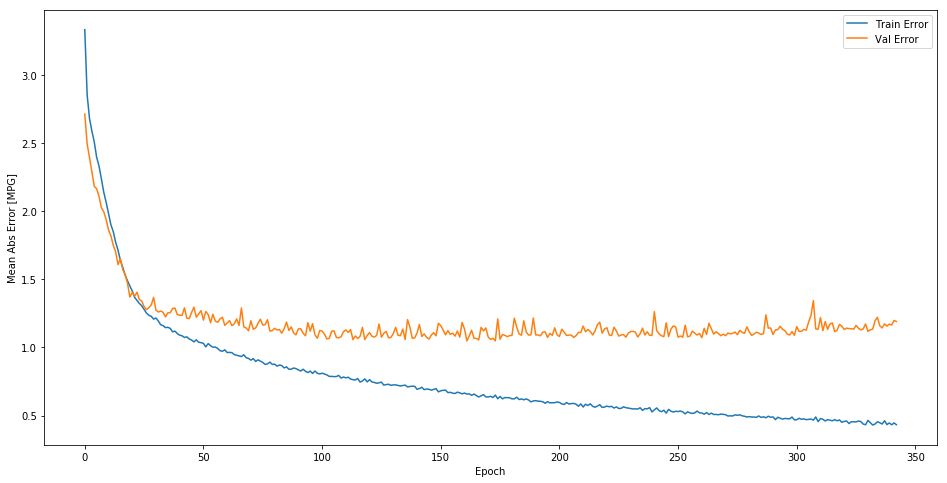

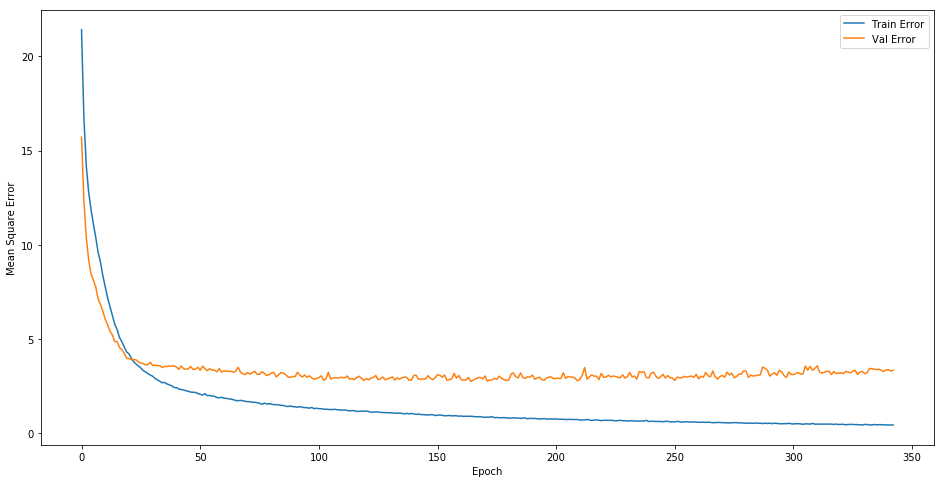

In [25]:
# instantiate new model
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10)

epochs = 1000
history = model.fit(X_train, y_train,
                    epochs=epochs, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[early_stop])

plot_history(history)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [27]:
# instantiate new model
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10)

epochs = 1000
history = model.fit(X, y,
                    epochs=epochs, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[early_stop])

df['preds'] = model.predict(X)

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

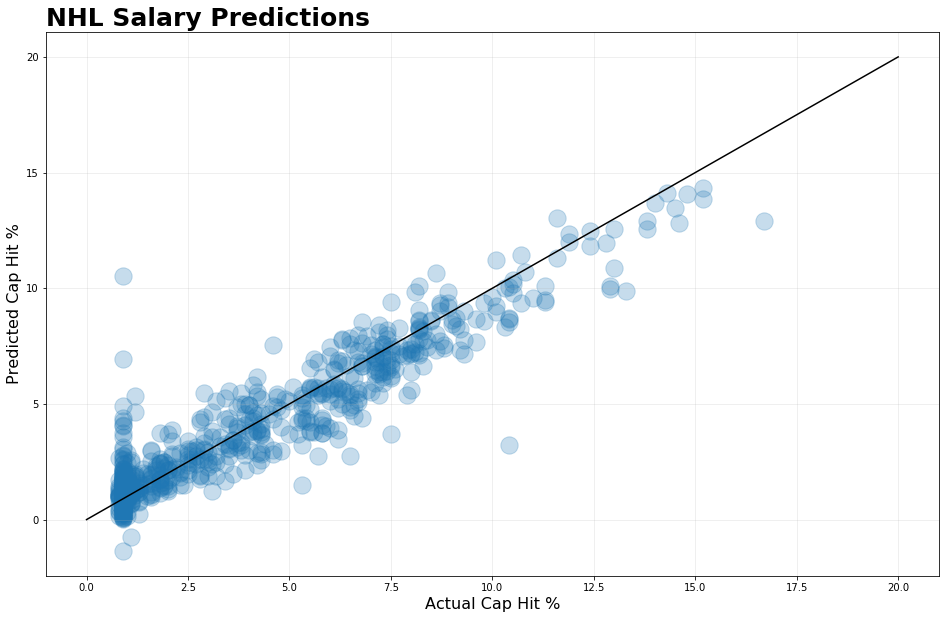

In [30]:
x = list(df['cap hit %'])
y = list(df['preds'])

plt.figure(figsize=(16,10))

plt.title('NHL Salary Predictions', 
          fontsize=25, 
          loc='left', 
          family='sans-serif',
          weight='bold')

plt.scatter(x,
            y,
            s=300,
            alpha=.25
)

plt.plot([0,20],[0,20], color='black')





plt.xlabel('Actual Cap Hit %', fontsize=16)
plt.ylabel('Predicted Cap Hit %', fontsize=16)

plt.grid(alpha=.25)

# plt.savefig('salary_preds.png', dpi=400, bbox_inches='tight')

plt.show()

In [31]:
df['dif'] = df['cap hit %'] - df['preds']

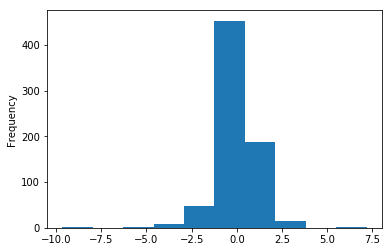

In [32]:
df['dif'].plot(kind='hist')

In [33]:
df[['player', 'dif']].sort_values('dif').head(10)

,player,dif
607,Brian Pinho,-9.648834
656,Jason Spezza,-6.062124
431,Kevin Labanc,-4.141547
677,Kyle Wood,-3.991026
645,Justin Kirkland,-3.497495
433,Nathan Beaulieu,-3.432232
625,C.J. Suess,-3.381659
703,Matt Irwin,-3.168100
664,Doyle Somerby,-3.151380
243,Sam Reinhart,-2.942278


In [34]:
df[['player', 'dif']].sort_values('dif', ascending=False).head(10)

,player,dif
19,Sebastian Aho,7.179063
73,Jake Guentzel,3.805769
227,Evgeni Dadonov,3.786806
0,Connor McDavid,3.772914
169,Michael Matheson,3.730191
9,Jack Eichel,3.403598
207,Oscar Klefbom,2.948285
20,Claude Giroux,2.927493
48,William Nylander,2.820168
228,Roman Josi,2.702191


In [35]:
df[['player', 'preds']].sort_values('preds', ascending=False).head(10)

,player,preds
7,Patrick Kane,14.322380
1,Artemi Panarin,14.124479
13,Evgeni Malkin,14.077326
6,Jonathan Toews,13.845545
8,Anze Kopitar,13.673635
3,Erik Karlsson,13.483192
18,Steven Stamkos,13.026426
0,Connor McDavid,12.927086
4,John Tavares,12.885427
2,Auston Matthews,12.818365


In [36]:
df[['player', 'preds']].sort_values('preds').head(10)

,player,preds
627,Cristoval Nieves,-1.345556
453,Ryan MacInnis,-0.747421
644,David Warsofsky,0.025361
621,John Gilmour,0.075243
678,Tyler Wotherspoon,0.078395
655,Dakota Mermis,0.112318
518,Ethan Prow,0.133385
463,Jani Hakanpää,0.140209
696,Seth Helgeson,0.140696
519,Aaron Ness,0.150544


In [37]:
df[df['player']=='Sebastian Aho'].transpose()

,19
player,Sebastian Aho
nhl_api_id_number,8480222
team,CAR
cap hit %,10.4
length,5
weight,176
height,183
signing age,21
was_RFA_at_signing,1
goals,1
